In [2]:
import pandas as pd
import numpy as np
import gymnasium as gym
from gymnasium.wrappers import FlattenObservation
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import pygame
from algorithms.rl import RL
from examples.test_env import TestEnv
from algorithms.planner import Planner
import itertools
import os
import matplotlib.pyplot as plt
import math
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# grid search
# from examples.grid_search import GridSearch

In [37]:
class Plots:
    @staticmethod
    def grid_world_policy_plot(data, label, n_states=64):
        if not math.modf(math.sqrt(len(data)))[0] == 0.0:
            warnings.warn("Grid map expected.  Check data length")
        else:
            grid = int(math.sqrt(n_states))
            data = np.around(np.array(data).reshape((grid, grid)), 2)
            df = pd.DataFrame(data=data)
            my_colors = ((0.0, 0.0, 0.0, 1.0), (0.8, 0.0, 0.0, 1.0), (0.0, 0.8, 0.0, 1.0), (0.0, 0.0, 0.8, 1.0))
            cmap = LinearSegmentedColormap.from_list('Custom', my_colors, len(my_colors))
            ax = sns.heatmap(df, cmap=cmap, linewidths=1.0)
            colorbar = ax.collections[0].colorbar
            colorbar.set_ticks([.4, 1.1, 1.9, 2.6])
            colorbar.set_ticklabels(['Left', 'Down', 'Right', 'Up'])
            plt.title(label)
            plt.show()

    @staticmethod
    def grid_values_heat_map(data, label, n_states=64):
        if not math.modf(math.sqrt(len(data)))[0] == 0.0:
            warnings.warn("Grid map expected.  Check data length")
        else:
            grid = int(math.sqrt(n_states))
            data = np.around(np.array(data).reshape((grid, grid)), 2)
            df = pd.DataFrame(data=data)
            sns.heatmap(df, annot=True).set_title(label)
            plt.show()

    @staticmethod
    def v_iters_plot(data, label):
        df = pd.DataFrame(data=data)
        df.columns = [label]
        sns.set_theme(style="whitegrid")
        title = label + " per Iterations"
        sns.lineplot(x=df.index, y=label, data=df).set_title(title)
        plt.show()

In [38]:
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=4))

c:\Users\lboad\py_venv\rl\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


runtime = 0.09 seconds


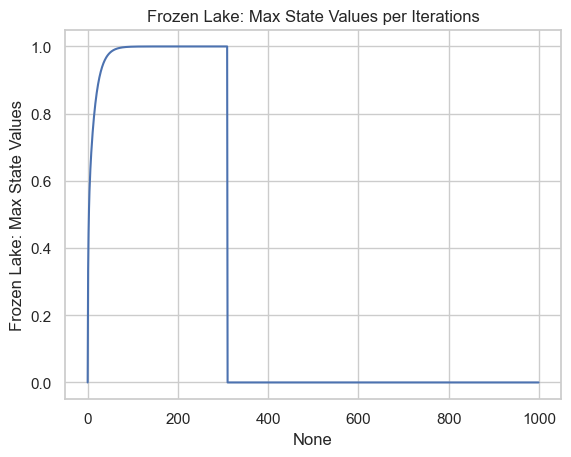

In [39]:
# VI/PI v_iters_plot
V, V_track, pi, conv_track = Planner(frozen_lake.env.P).value_iteration()
# V, V_track, pi = Planner(frozen_lake.env.P).policy_iteration()
max_value_per_iter = np.amax(V_track, axis=1)
Plots.v_iters_plot(max_value_per_iter, "Frozen Lake: Max State Values")
plt.show()

In [ ]:
# VI/PI grid_world_policy_plot
# V, V_track, pi = Planner(frozen_lake.env.P).value_iteration()
n_states = frozen_lake.env.observation_space.n
new_pi = list(map(lambda x: pi(x), range(n_states)))
s = int(math.sqrt(n_states))
Plots.grid_world_policy_plot(np.array(new_pi), "Grid World Policy")

c:\Users\lboad\py_venv\rl\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


runtime = 0.07 seconds


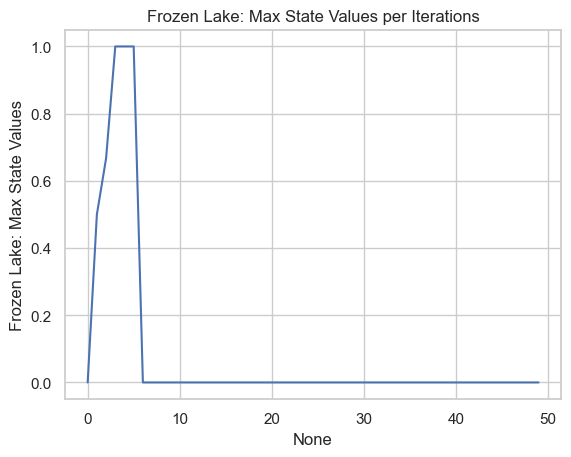

In [40]:
# VI/PI v_iters_plot
# V, V_track, pi = Planner(frozen_lake.env.P).value_iteration()
V, V_track, pi, conv_track = Planner(frozen_lake.env.P).policy_iteration()
max_value_per_iter = np.amax(V_track, axis=1)
Plots.v_iters_plot(max_value_per_iter, "Frozen Lake: Max State Values")
plt.show()

runtime = 6.43 seconds


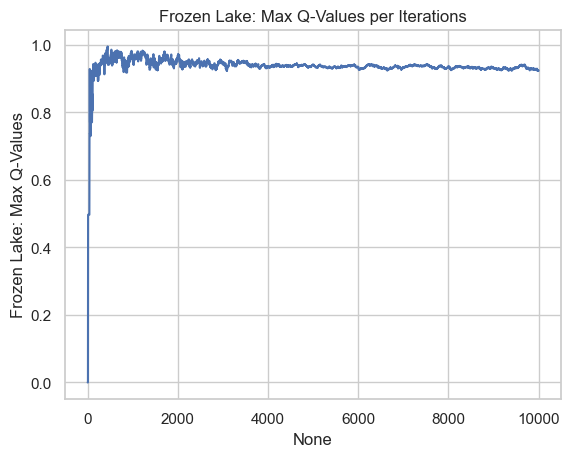

In [41]:
# Q-learning v_iters_plot
Q, V, pi, Q_track, pi_track = RL(frozen_lake.env).q_learning()
max_q_value_per_iter = np.amax(np.amax(Q_track, axis=2), axis=1)
Plots.v_iters_plot(max_q_value_per_iter, "Frozen Lake: Max Q-Values")

In [54]:
Q.shape

(16, 4)

In [47]:
pi_track[-1]

array([2, 2, 2, 2, 1, 1, 3, 2, 1, 0, 0, 2, 1, 1, 1, 0], dtype=int64)

In [86]:
pi_track[0].shape

(16,)

In [63]:
Q_track.shape

(10000, 16, 4)

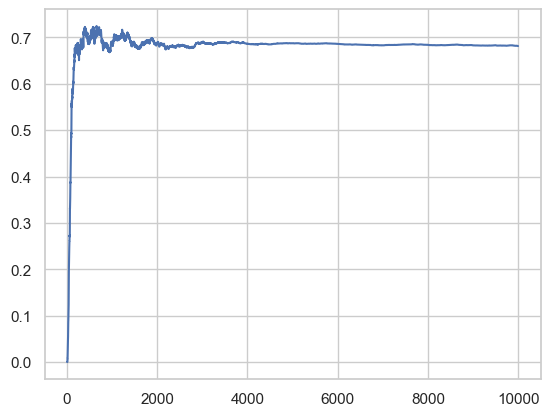

In [85]:
plt.plot(Q_track.mean(axis=2).mean(1))

In [83]:
Q_track.mean(axis=1).mean(1)

array([0.        , 0.        , 0.        , ..., 0.68136438, 0.68134338,
       0.68135091])